Lets try support vector regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
# load data
df = pd.read_csv('data_frame.csv',sep='\t', encoding='utf-8')
X = np.loadtxt('X.out', delimiter=',')
Y = np.loadtxt('Y.out',delimiter=',')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
df.head()

,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,lengthy_words,tokenized_essay,Avg_word_len,...,punctuation,mentions,mentions_count,spell_mistakes,essay_POS,count_adjectives,count_nouns,count_adverbs,num_sentences,bag_of_words
0,0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,0.254438,"[dear, local, newspaper,, I, think, effect, co...",4.550296,...,55.0,"[@ORGANIZATION1,, @ORGANIZATION2,, @CAPS1,, @D...",5,42.0,"[(Dear, NNP), (local, JJ), (newspaper, NN), (,...",0.051813,0.142487,0.054404,11,"[{u'Dear': 1}, {u'local': 1}, {u'newspaper': 1..."
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,0.269690,"[dear, @caps1, @caps2,, I, believ, use, comput...",4.463007,...,46.0,"[@CAPS1, @CAPS2,, @NUM1, @MONTH1, @LOCATION1.,...",10,34.0,"[(Dear, NNP), (@, NNP), (CAPS1, NNP), (@, NNP)...",0.040948,0.118534,0.036638,19,"[{u'Dear': 1}, {u'CAPS1': 1}, {u'CAPS2': 1}, {..."
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,0.308244,"[dear,, @caps1, @caps2, @caps3, more, peopl, u...",4.526882,...,34.0,"[@CAPS1, @CAPS2, @CAPS3, @CAPS4,, @MONTH1, @CA...",7,16.0,"[(Dear, NNP), (,, ,), (@, NNP), (CAPS1, NNP), ...",0.047923,0.124601,0.035144,15,"[{u'Dear': 1}, {u'CAPS1': 1}, {u'CAPS2': 1}, {..."
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,0.383588,"[dear, local, newspaper,, @caps1, I, found, ma...",5.041985,...,91.0,"[@CAPS1, @PERCENT1, @CAPS2, @PERSON1, @PERSON2...",39,80.0,"[(Dear, NNP), (Local, NNP), (Newspaper, NNP), ...",0.068740,0.119476,0.042553,25,"[{u'Dear': 1}, {u'Local': 1}, {u'Newspaper': 1..."
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,0.288172,"[dear, @location1,, I, know, comput, posit, ef...",4.526882,...,55.0,"[@LOCATION1,, @NUM1, @LOCATION2, @CAPS1]",4,28.0,"[(Dear, NNP), (@, NNP), (LOCATION1, NNP), (,, ...",0.044487,0.127660,0.065764,31,"[{u'Dear': 1}, {u'LOCATION1': 1}, {u'I': 1}, {..."


In [5]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)

In [6]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
print(regr.feature_importances_)

[9.55631113e-01 4.48240167e-03 1.24888483e-04 4.97627567e-04
 1.14150583e-04 1.96758306e-04 1.34614118e-04 8.07450804e-03
 2.73202864e-02 1.53102276e-03 1.89262877e-03]


based on the above result, we can drop few features which does not contribute much towards the final score. these features are:
    1. count_adverbs
    2. count_nouns
    3. count_adjectives
    4. spell_mistakes
    5. mentions_count
Hence, new features: 
'essay_set','num_sentences','count_nouns','punctuation','word_count','Avg_word_len','lengthy_words'

In [8]:
df[['essay_set','num_sentences','punctuation','word_count','Avg_word_len','lengthy_words']].head()

,essay_set,num_sentences,punctuation,word_count,Avg_word_len,lengthy_words
0,1,11,55.0,181,4.550296,0.254438
1,1,19,46.0,244,4.463007,0.269690
2,1,15,34.0,150,4.526882,0.308244
3,1,25,91.0,317,5.041985,0.383588
4,1,31,55.0,254,4.526882,0.288172


In [9]:
X = df[['essay_set','num_sentences','punctuation','word_count','Avg_word_len','lengthy_words']].as_matrix()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
print(regr.feature_importances_)

[0.95583269 0.00461064 0.00824925 0.02754986 0.00168761 0.00206996]


In [13]:
prediction = regr.predict(X_test)

def classify(prediction):
    for i in range(len(prediction)):
        if prediction[i] > 60: # 
            prediction[i] = 30.0
        prediction[i] = int(round(prediction[i]))
    return prediction
prediction = classify(prediction)

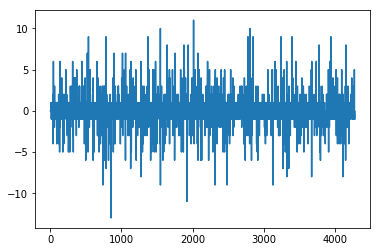

In [14]:
plt.plot(prediction-y_test)
plt.show()

In [15]:
prediction.max()

43.0

In [16]:
prediction.min()

1.0

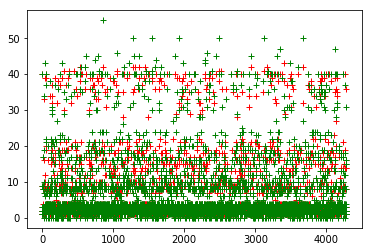

In [17]:
xvals = np.arange(0,len(prediction)) 
yvals = prediction 
plt.plot(xvals, yvals,'r+')
plt.plot(xvals,y_test,'g+')
plt.show() 

Lets explore few commonly used metrics

Mean Squared error :

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, prediction))

1.5784416162868204

R2 : perfect score is 1.0

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.967185769423388

Lets try quadratic weighted kappa as explained in kaggle essay competition competition

In [20]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, prediction)

0.43619526783189766

Lets try tweaking some parameters 

In [21]:
for i in range(10,1000,50):
    print i,
    regr_sr = RandomForestRegressor(n_estimators = i,  max_depth=5, random_state=0)
    regr_sr.fit(X_train, y_train)
    pred_sr = regr.predict(X_test)
    print 'kappa: '+str(cohen_kappa_score(y_test, classify(pred_sr))),
    print 'r2: '+str(r2_score(y_test, classify(pred_sr)))

10 kappa: 0.43619526783189766 r2: 0.967185769423388
60 kappa: 0.43619526783189766 r2: 0.967185769423388
110 kappa: 0.43619526783189766 r2: 0.967185769423388
160 kappa: 0.43619526783189766 r2: 0.967185769423388
210 kappa: 0.43619526783189766 r2: 0.967185769423388
260 kappa: 0.43619526783189766 r2: 0.967185769423388
310 kappa: 0.43619526783189766 r2: 0.967185769423388
360 kappa: 0.43619526783189766 r2: 0.967185769423388
410 kappa: 0.43619526783189766 r2: 0.967185769423388
460 kappa: 0.43619526783189766 r2: 0.967185769423388
510 kappa: 0.43619526783189766 r2: 0.967185769423388
560 kappa: 0.43619526783189766 r2: 0.967185769423388
610 kappa: 0.43619526783189766 r2: 0.967185769423388
660 kappa: 0.43619526783189766 r2: 0.967185769423388
710 kappa: 0.43619526783189766 r2: 0.967185769423388
760 kappa: 0.43619526783189766 r2: 0.967185769423388
810 kappa: 0.43619526783189766 r2: 0.967185769423388
860 kappa: 0.43619526783189766 r2: 0.967185769423388
910 kappa: 0.43619526783189766 r2: 0.96718576942

In [22]:
for i in range(1,6):
    print i,
    regr_sr = RandomForestRegressor(max_features = i,  max_depth=5, random_state=0)
    regr_sr.fit(X_train, y_train)
    pred_sr = regr.predict(X_test)
    print 'kappa: '+str(cohen_kappa_score(y_test, classify(pred_sr))),
    print 'r2: '+str(r2_score(y_test, classify(pred_sr)))

1 kappa: 0.43619526783189766 r2: 0.967185769423388
2 kappa: 0.43619526783189766 r2: 0.967185769423388
3 kappa: 0.43619526783189766 r2: 0.967185769423388
4 kappa: 0.43619526783189766 r2: 0.967185769423388
5 kappa: 0.43619526783189766 r2: 0.967185769423388


In [23]:
for i in range(1,50,5):
    print i,
    regr_sr = RandomForestRegressor(max_depth = i, random_state=0)
    regr_sr.fit(X_train, y_train)
    pred_sr = regr.predict(X_test)
    print 'kappa: '+str(cohen_kappa_score(y_test, classify(pred_sr))),
    print 'r2: '+str(r2_score(y_test, classify(pred_sr)))

1 kappa: 0.43619526783189766 r2: 0.967185769423388
6 kappa: 0.43619526783189766 r2: 0.967185769423388
11 kappa: 0.43619526783189766 r2: 0.967185769423388
16 kappa: 0.43619526783189766 r2: 0.967185769423388
21 kappa: 0.43619526783189766 r2: 0.967185769423388
26 kappa: 0.43619526783189766 r2: 0.967185769423388
31 kappa: 0.43619526783189766 r2: 0.967185769423388
36 kappa: 0.43619526783189766 r2: 0.967185769423388
41 kappa: 0.43619526783189766 r2: 0.967185769423388
46 kappa: 0.43619526783189766 r2: 0.967185769423388
